In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, learning_curve
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score, roc_auc_score

In [35]:
labels = pd.read_csv('./../../labels/labels_v1/labels_v1.csv', index_col=0)
features = pd.read_csv('./../../data_preprocessing/genetic_data_preprocessing/cleaned_Genomic_features_all_repositories.csv', index_col=0)
pd.set_option('display.max_rows', None)
labels

,SAMPLE_ID,labels_v1
0,Sample_0003,1
1,Sample_0004,1
2,Sample_0006,0
3,Sample_0009,1
4,Sample_0011,1
5,Sample_0012,0
6,Sample_0013,1
7,Sample_0014,0
8,Sample_0015,1
9,Sample_0016,1


## Merge features and labels

In [36]:
table_v1 = pd.merge(features, labels, on='SAMPLE_ID', how='inner')

table_v1 = table_v1.drop(columns=['Unnamed: 0'], errors='ignore')

table_v1 = table_v1.set_index('SAMPLE_ID', inplace=False)
table_v1.to_excel('merged_labels_and_features_v1.xlsx')

# First model run - labels v1, all features

### Train/test split

In [37]:
columns_to_drop = ['labels_v1']

# features definition
X = table_v1.drop(columns_to_drop, axis=1)

# labels definition
y = table_v1['labels_v1'] # labels

original_indices = X.index

In [38]:
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, original_indices, test_size=0.3, random_state=42)

y_train.to_excel('training_set_v1.xlsx')
y_test.to_excel('test_set_v1.xlsx')

### Features normalization

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X.shape)
print(y.shape)

(196, 81)
(196,)


### Model training

In [40]:
model = LogisticRegression()
model.fit(X_train, y_train)

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.6        0.48717949 0.58974359 0.58974359 0.61538462]
Mean accuracy: 0.5764102564102564


/home/klaudiautm/PycharmProjects/final_project/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/klaudiautm/PycharmProjects/final_project/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

### Model testing

In [41]:
y_pred = model.predict(X_test)

y_pred_list = pd.DataFrame(y_pred, columns=['Predicted'], index=idx_test)
y_pred_list.to_excel('predicted_labels_test_set_v1.xlsx')

### Model evaluation

In [42]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"AUC: {roc_auc}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(cr)

Accuracy: 0.5932203389830508
AUC: 0.5785714285714285
Confusion Matrix:
[[12 12]
 [12 23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        24
           1       0.66      0.66      0.66        35

    accuracy                           0.59        59
   macro avg       0.58      0.58      0.58        59
weighted avg       0.59      0.59      0.59        59



<Axes: >

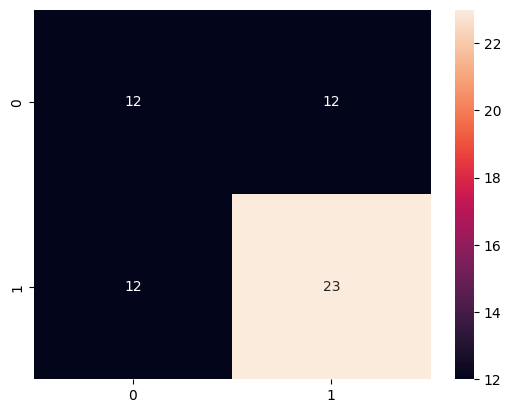

In [43]:
import seaborn as sns
sns.heatmap(cm, annot=True)

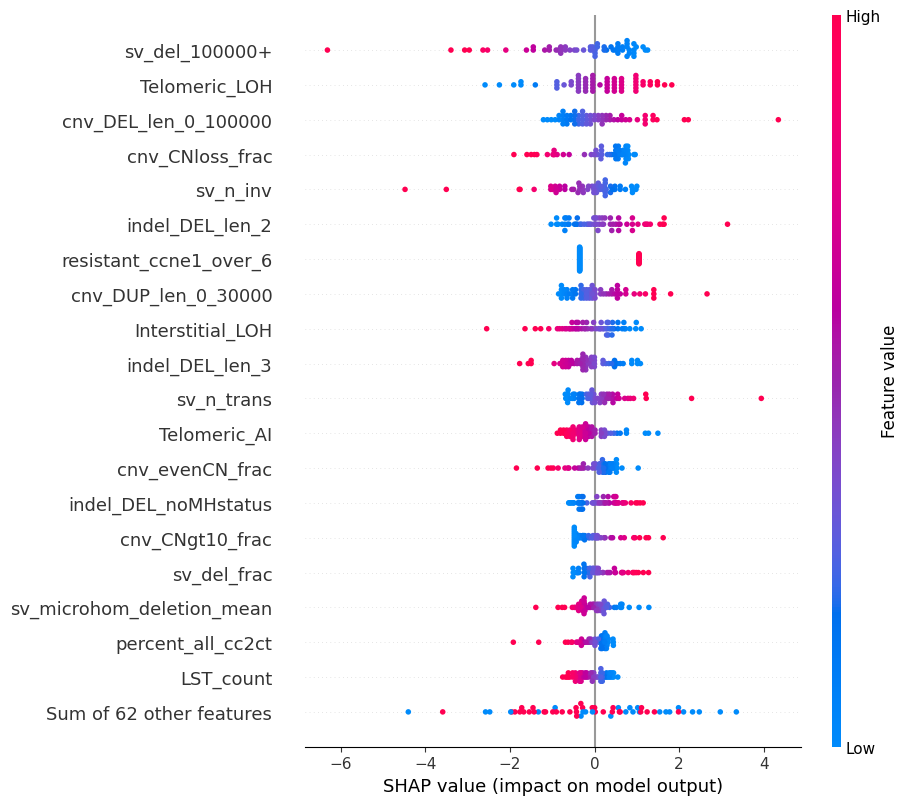

In [44]:
import shap

original_feature_names = ['other_HRR_gene_mutation_somatic', 'cnv_N_CNdipl', 'cnv_N_CNloss', 'cnv_N_CNgain', 'cnv_CNlt5_frac', 'cnv_CNgt10_frac', 'cnv_evenCN_frac', 'cnv_CNloss_frac', 'cnv_DUP_len_30000_inf', 'cnv_DUP_len_30_100', 'cnv_DEL_len_100000_inf', 'cnv_DIPLOID_len_100000_inf', 'sv_n_trans', 'sv_n_del', 'sv_n_inv', 'sv_n_tadem_dup', 'sv_trans_frac', 'sv_del_frac', 'sv_inv_frac', 'sv_tadem_dup_frac', 'sv_n_all_sv', 'sv_n_svclass_stdev', 'sv_dup_30000+', 'sv_del_100000+', 'sv_microhom_deletion_mean', 'sv_microhom_inversion_mean', 'sv_microhom_tandem-duplication_mean', 'sv_microhom_translocation_mean', 'indel_n_del', 'indel_n_ins', 'indel_insdel_ratio', 'indel_DEL_len_1', 'indel_DEL_len_2', 'indel_DEL_len_3', 'indel_DEL_len_4', 'indel_DEL_len_inf', 'indel_INS_len_1', 'indel_INS_len_2', 'indel_INS_len_3', 'indel_INS_len_4', 'indel_INS_len_inf', 'indel_DEL_mh', 'indel_DEL_noMHstatus', 'indel_DEL_rep', 'indel_ratio', 'Telomeric_AI', 'Interstitial_AI', 'Telomeric_LOH', 'Interstitial_LOH', 'Ploidy', 'aberrant_cell_fraction', 'LST_count', 'LOH_count', 'MSI', 'cnv_DEL_0_3500_sum_indel_DEL_len_inf', 'indel_INS_len_inf_sum_cnv_DUP_0_30000', 'indel_INS_len_inf_sum_cnv_DUP_0_1000', 'frac_cnv_DUP_len_30000_inf', 'frac_cnv_DEL_len_100000_inf', 'frac_cnv_DIPLOID_len_100000_inf', 'frac_sv_dup_30000+', 'frac_sv_del_frac', 'frac_sv_del_100000+', 'FBI_relaxed', 'percent_all_cc2ca', 'percent_all_cc2ct', 'cc2ca_vs_cc2ct', 'SBS31', 'ccne1_amp', 'resistant_ccne1_over_6', 'BRCA1/2_mut', 'cnv_DUP_len_0_30000', 'cnv_DEL_len_0_100000', 'cnv_DIPLOID_len_0_100000', 'sv_dup_0_30000', 'sv_del_0_100000', 'frac_cnv_DUP_len_0_30000', 'frac_cnv_DEL_len_0_100000', 'frac_cnv_DIPLOID_len_0_100000', 'frac_sv_dup_0_30000', 'frac_sv_del_0_100000']
X_train_features = pd.DataFrame(X_train, columns=original_feature_names)
X_test_features = pd.DataFrame(X_test, columns=original_feature_names)

explainer = shap.Explainer(model, X_train_features)
shap_values = explainer(X_test_features)
shap.plots.beeswarm(shap_values, max_display=20)